## Problem Statement 

The logistics analytics market is projected to grow at a Compound Annual Growth Rate (CAGR) of 17.3% from 2019 to 2024, indicating a significant expansion. This growth emphasizes the increasing recognition among logistics organizations of the benefits associated with predicting future events with a reasonable level of certainty. The ability to foresee outcomes allows logistics leaders to address supply chain challenges, reduce costs, and improve service levels simultaneously.

## Goal 

The primary objective of this project is to predict consignment pricing based on various factors available in the dataset. By leveraging predictive analytics, we aim to develop a model that accurately forecasts the pricing of consignments. This predictive capability will empower logistics stakeholders to make informed decisions, optimize supply chain processes, and enhance overall operational efficiency.

## Approach

To achieve the goal of consignment pricing prediction, we have undertaken the following steps:

Data Exploration and Understanding: Thoroughly analyzed the dataset to gain insights into the available features and their relationships.

Data Preprocessing: Cleaned and transformed the data, handling missing values, encoding categorical variables, and scaling numerical features as needed.

Exploratory Data Analysis (EDA): Conducted EDA to visualize the distribution of variables, identify patterns, and understand the correlation between different features.

Feature Engineering: Engineered new features and performed transformations to enhance the predictive power of the model.

Model Selection: Employed various regression models, including Linear Regression, Decision Tree Regressor, Random Forest Regressor, AdaBoost Regressor, Gradient Boosting Regressor, and XGBoost Regressor.

Model Training and Evaluation: Trained each model on the dataset and evaluated their performance using metrics such as Mean Squared Error (MSE) and R-squared (R2) on both the training and testing sets.

Summary Table: Compiled a summary table comparing the performance metrics of each model on the training and testing sets, rounding off the results to four decimal places.

## Attributes


1. **ID:** Unique identifier for each record.

2. **Project Code:** Code representing the project.

3. **PQ #:** Purchase Order (PQ) number.

4. **PO / SO #:** Purchase Order (PO) or Sales Order (SO) number.

5. **ASN/DN #:** Advanced Shipping Notice (ASN) or Delivery Note (DN) number.

6. **Country:** Country where the project is located.

7. **Managed By:** Entity responsible for managing the project.

8. **Fulfill Via:** Method used to fulfill the project.

9. **Vendor INCO Term:** Vendor Inco Term specifying the responsibilities for shipping costs.

10. **Shipment Mode:** Mode of shipment.

11. **PQ First Sent to Client Date:** Date when the PQ was first sent to the client.

12. **PO Sent to Vendor Date:** Date when the PO was sent to the vendor.

13. **Scheduled Delivery Date:** Scheduled delivery date for the project.

14. **Delivered to Client Date:** Date when the project was delivered to the client.

15. **Delivery Recorded Date:** Date when the delivery was recorded.

16. **Product Group:** Group to which the product belongs.

17. **Sub Classification:** Sub-classification of the product.

18. **Vendor:** Vendor providing the product.

19. **Item Description:** Description of the item.

20. **Molecule/Test Type:** Molecule or test type of the item.

21. **Brand:** Brand of the product.

22. **Dosage:** Dosage of the product.

23. **Dosage Form:** Form in which the dosage is administered.

24. **Unit of Measure (Per Pack):** Unit of measure per pack.

25. **Line Item Quantity:** Quantity of the line item.

26. **Line Item Value:** Value of the line item.

27. **Pack Price:** Price per pack.

28. **Unit Price:** Price per unit.

29. **Manufacturing Site:** Site where the product is manufactured.

30. **First Line Designation:** Designation of the first line.

31. **Weight (Kilograms):** Weight of the shipment in kilograms.

32. **Freight Cost (USD):** Freight cost in US dollars.

33. **Line Item Insurance (USD):** Insurance cost for the line item in US dollars.

In [143]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
path="D:\Data Science\Machine Learning\SCMS_Delivery_History_Dataset.csv"
df=pd.read_csv(path)
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [4]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [5]:
df.describe(include='object')

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD)
count,10324,10324,10324,10324,10324,10324,10324,10324,9964,10324,...,10324,10324,10324,10324,8588,10324,10324,10324,10324,10324
unique,142,1237,6233,7030,43,4,2,8,4,765,...,73,184,86,48,54,17,88,2,4688,6733
top,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,...,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost
freq,768,2681,67,54,1406,10265,5404,5404,6113,2476,...,5404,755,1125,7285,990,3532,3172,7030,1507,1442


## Evaluating the Columns one by one 

In [6]:
df["ID"].nunique()

10324

In [7]:
# Since it is a unique ID we can drop it
df.drop("ID",axis=1,inplace=True)


In [8]:
df["Project Code"].nunique()

142

In [9]:
# Since the Project code wont play any role in our analysis we can drop it
df.drop("Project Code",axis=1,inplace=True)

In [10]:
df["PQ #"].nunique()

1237

In [11]:
df["PQ #"].unique()

array(['Pre-PQ Process', 'FPQ-4587', 'FPQ-12051', ..., 'FPQ-13316',
       'FPQ-14064', 'FPQ-16523'], dtype=object)

In [12]:
# Removing the characters after - from PQ #
df["PQ #"]=df["PQ #"].str.split("-").str[0]

In [13]:
df["PQ #"].unique()

array(['Pre', 'FPQ'], dtype=object)

<Axes: xlabel='PQ #', ylabel='count'>

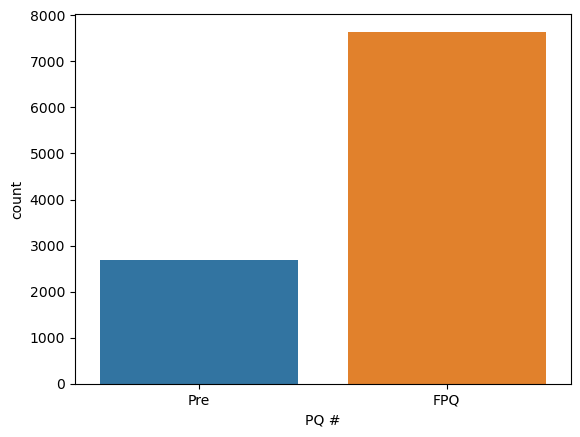

In [14]:
# Plotting bar graph using seaborn
sns.countplot(x="PQ #",data=df)

In [15]:
df["PO / SO #"].nunique()

6233

In [16]:
df["PO / SO #"].unique()

array(['SCMS-4', 'SCMS-13', 'SCMS-20', ..., 'SO-51424', 'SO-51420',
       'SO-51680'], dtype=object)

In [17]:
# Removing the characters after - from PO / SO #
df["PO / SO #"]=df["PO / SO #"].str.split("-").str[0]

In [18]:
df["PO / SO #"].unique()

array(['SCMS', 'DSCM', 'SO'], dtype=object)

<Axes: xlabel='PO / SO #', ylabel='count'>

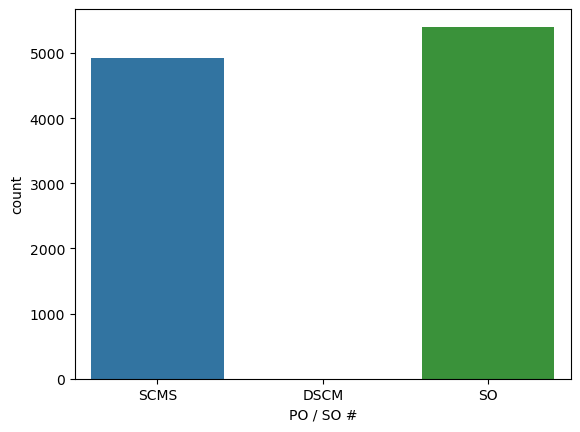

In [19]:
# Plotting bar graph using seaborn
sns.countplot(x="PO / SO #",data=df)

In [20]:
df["ASN/DN #"].nunique()

7030

In [21]:
df["ASN/DN #"].unique()

array(['ASN-8', 'ASN-85', 'ASN-14', ..., 'DN-4276', 'DN-4279', 'DN-4334'],
      dtype=object)

In [22]:
# Removing the characters after - from ASN/DN #
df["ASN/DN #"]=df["ASN/DN #"].str.split("-").str[0]

In [23]:
df["ASN/DN #"].unique()

array(['ASN', 'DN'], dtype=object)

<Axes: xlabel='ASN/DN #', ylabel='count'>

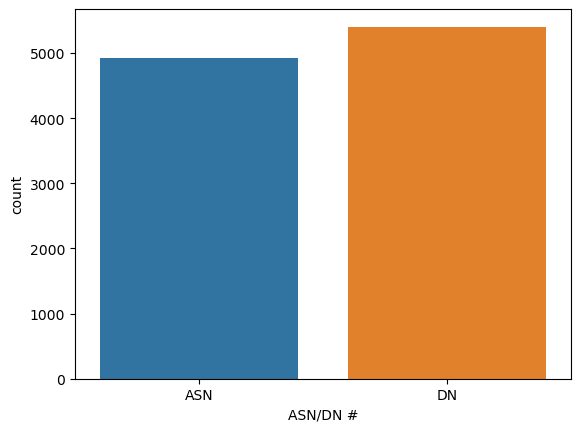

In [24]:
# Plotting bar graph using seaborn
sns.countplot(x="ASN/DN #",data=df)

In [25]:
df["Country"].value_counts()

Country
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                

In [26]:
# Grouping the countries having count less than 100 as Others in Country column
df["Country"] = np.where(df["Country"].map(df["Country"].value_counts()) < 100, "Others", df["Country"])



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, "Côte d'Ivoire"),
  Text(1, 0, 'Vietnam'),
  Text(2, 0, 'Nigeria'),
  Text(3, 0, 'Zambia'),
  Text(4, 0, 'Tanzania'),
  Text(5, 0, 'Rwanda'),
  Text(6, 0, 'Haiti'),
  Text(7, 0, 'Zimbabwe'),
  Text(8, 0, 'Ethiopia'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Guyana'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Mozambique'),
  Text(13, 0, 'Kenya'),
  Text(14, 0, 'Uganda'),
  Text(15, 0, 'South Sudan'),
  Text(16, 0, 'Congo, DRC')])

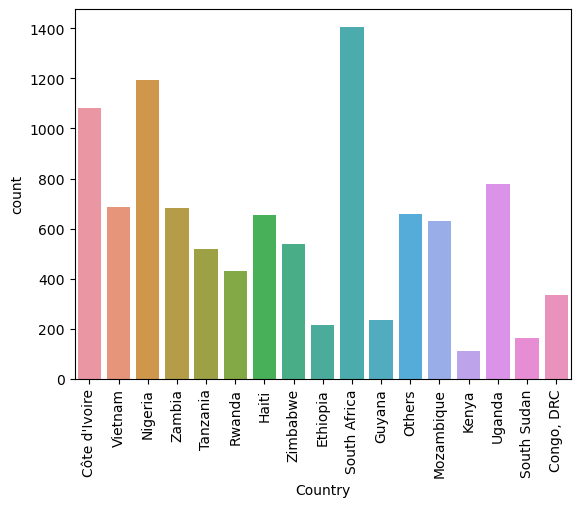

In [27]:
# Plotting bar graph using seaborn
sns.countplot(x="Country",data=df)
plt.xticks(rotation=90)

In [28]:
df["Managed By"].value_counts()

Managed By
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

In [29]:
# Dropping the column as it is of no use
df.drop("Managed By",axis=1,inplace=True)

In [30]:
df["Fulfill Via"].value_counts()

Fulfill Via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

<Axes: xlabel='Fulfill Via', ylabel='count'>

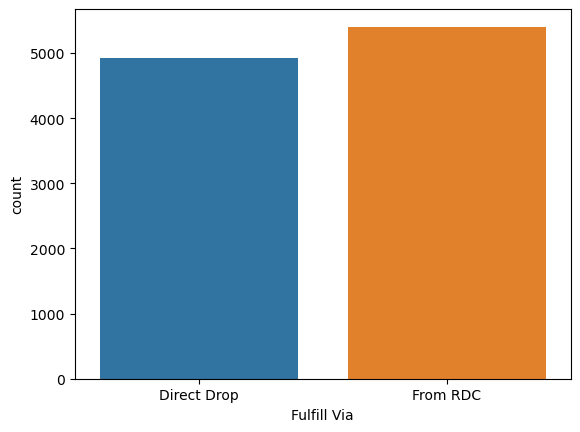

In [31]:
# Plotting bar graph using seaborn
sns.countplot(x="Fulfill Via",data=df)


In [32]:
df["Vendor INCO Term"].value_counts()

Vendor INCO Term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

<Axes: xlabel='Vendor INCO Term', ylabel='count'>

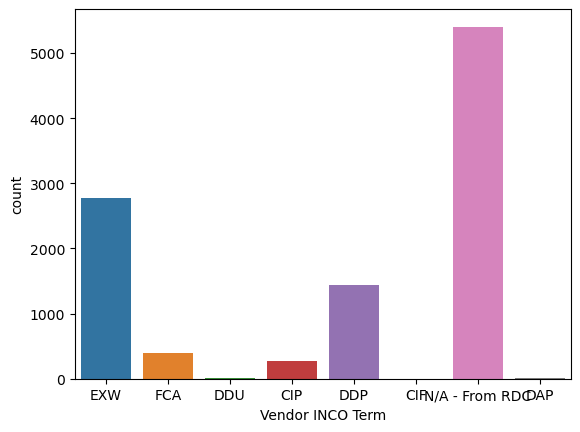

In [33]:
# Plotting bar graph using seaborn
sns.countplot(x="Vendor INCO Term",data=df)

In [34]:
df["Shipment Mode"].value_counts()

Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

<Axes: xlabel='Shipment Mode', ylabel='count'>

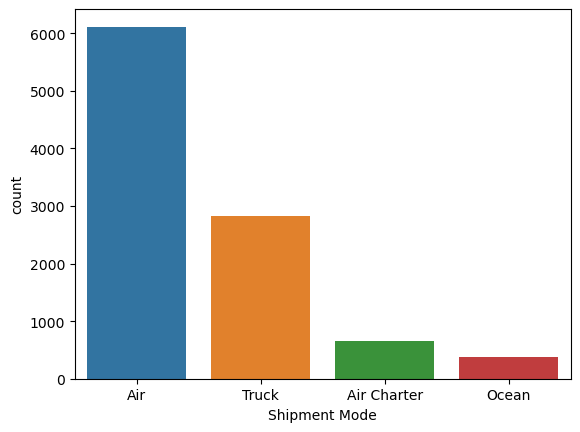

In [35]:
# Plotting bar graph using seaborn
sns.countplot(x="Shipment Mode",data=df)

In [36]:
# Filling missing values of Shipment Mode with Mode
df["Shipment Mode"].fillna("Mode",inplace=True)

In [37]:
# Dropping 
# PQ First Sent to Client Date
# PO Sent to Vendor Date
# Scheduled Delivery Date
# Delivered to Client Date
# Delivery Recorded Date as dates are of no use
df.drop(["PQ First Sent to Client Date","PO Sent to Vendor Date","Scheduled Delivery Date","Delivered to Client Date","Delivery Recorded Date"],axis=1,inplace=True)

In [38]:
df["Product Group"].value_counts()

Product Group
ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

<Axes: xlabel='Product Group', ylabel='count'>

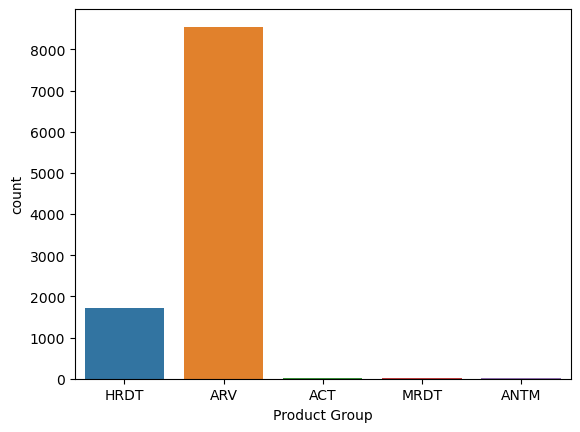

In [39]:
# Plotting bar graph using seaborn
sns.countplot(x="Product Group",data=df)

In [40]:
df["Sub Classification"].value_counts()

Sub Classification
Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64

<Axes: xlabel='Sub Classification', ylabel='count'>

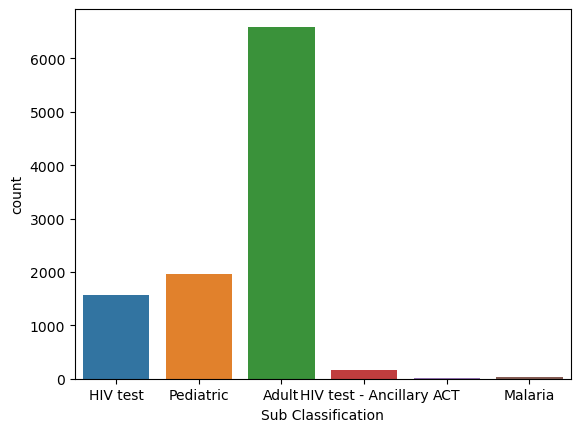

In [41]:
# Plotting bar graph using seaborn
sns.countplot(x="Sub Classification",data=df)

In [42]:
df["Vendor"].value_counts()

Vendor
SCMS from RDC                                   5404
Orgenics, Ltd                                    754
S. BUYS WHOLESALER                               715
Aurobindo Pharma Limited                         668
Trinity Biotech, Plc                             356
                                                ... 
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)       1
OMEGA DIAGNOSTICS LTD                              1
PLURIPHARM S.A.                                    1
CENTRAL PHARMACEUTICAL COMPANY NO. 1               1
AUROBINDO PHARAM (SOUTH AFRICA)                    1
Name: count, Length: 73, dtype: int64

In [43]:
# Dropping the column as it is of no use
df.drop("Vendor",axis=1,inplace=True)

In [44]:
df["Item Description"].value_counts()

Item Description
Efavirenz 600mg, tablets, 30 Tabs                                                755
Nevirapine 200mg, tablets, 60 Tabs                                               623
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                597
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                 580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                   577
                                                                                ... 
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs      1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                       1
Malaria Antigen P.f Kit, 30 x 1 Test                                               1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml      1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                              1
Name: count, Length: 184, dtype: int64

In [45]:
# Dropping the column as it is of no use
df.drop("Item Description",axis=1,inplace=True)

In [46]:
df["Molecule/Test Type"].value_counts()

Molecule/Test Type
Efavirenz                           1125
Nevirapine                           877
Lamivudine/Nevirapine/Zidovudine     707
Lamivudine/Zidovudine                689
Lopinavir/Ritonavir                  633
                                    ... 
Mefloquine (as hydrochloride)          1
Quinine (as sulfate)                   1
Primaquine base (as diphosphate)       1
Lamivudine/Zidovudine+Abacavir         1
Nelfinavir                             1
Name: count, Length: 86, dtype: int64

In [47]:
# Dropping the column as it is of no use
df.drop("Molecule/Test Type",axis=1,inplace=True)

In [48]:
df["Brand"].value_counts()

Brand
Generic            7285
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             165
Norvir              136
Stat-Pak            115
Bioline             113
Truvada              94
Videx                84
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Invirase             53
Viread               52
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
DoubleCheck           5
INSTi                 5
Multispot             5
Paramax               5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb

In [49]:
# Dropping the column as it is of no use
df.drop("Brand",axis=1,inplace=True)

In [50]:
df["Dosage"].value_counts()

Dosage
300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
60/30mg             73
100/25mg            73
600/300mg           63
300/100mg           54
1mg/ml              54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
80mg/ml             13
500/25mg            13
60/100/12mg         12
20/120mg            12
2g                  11
500mg               10
150/300+200mg        8
150/

In [51]:
# Dropping the column as it is of no use
df.drop("Dosage",axis=1,inplace=True)

In [52]:
df["Dosage Form"].value_counts()

Dosage Form
Tablet                                3532
Tablet - FDC                          2749
Test kit                              1575
Capsule                                729
Oral solution                          727
Chewable/dispersible tablet - FDC      239
Oral suspension                        214
Test kit - Ancillary                   161
Chewable/dispersible tablet            146
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: count, dtype: int64

In [53]:
# Dropping the column as it is of no use
df.drop("Dosage Form",axis=1,inplace=True)

In [54]:
df["Unit of Measure (Per Pack)"].value_counts()

Unit of Measure (Per Pack)
60      4121
30      2630
100      976
240      670
120      474
20       470
90       222
300      157
1        126
25       114
200       76
180       76
270       53
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: count, dtype: int64

<Axes: xlabel='Unit of Measure (Per Pack)', ylabel='Density'>

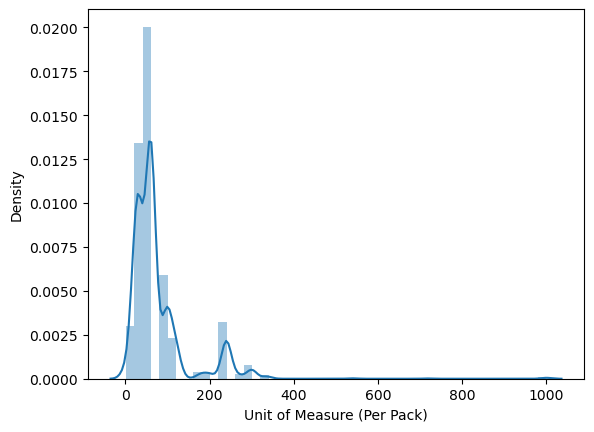

In [55]:
# Plotting histogram with distribution 
sns.distplot(df["Unit of Measure (Per Pack)"], kde=True)


<Axes: >

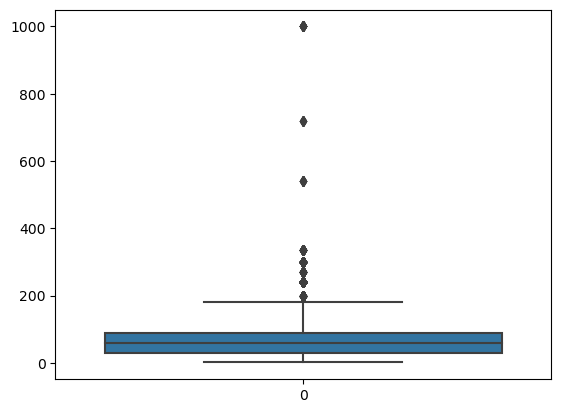

In [56]:
# Using boxplot
sns.boxplot(df["Unit of Measure (Per Pack)"])

In [ ]:
# Create a new column 'Unit of Measure (Per Pack)log' as the log-transformed version of the original column
df['Unit of Measure (Per Pack)log'] = df['Unit of Measure (Per Pack)'].apply(lambda x: 0 if x == 0 else np.log(x))

# Identify outliers using 1.5 times the interquartile range (IQR)
Q1 = df['Unit of Measure (Per Pack)log'].quantile(0.25)
Q3 = df['Unit of Measure (Per Pack)log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Unit of Measure (Per Pack)log'] < (Q1 - 1.5 * IQR)) | (df['Unit of Measure (Per Pack)log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Unit of Measure (Per Pack)log'] = df.loc[~outlier_mask, 'Unit of Measure (Per Pack)log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

# Optionally, create a new column for capped values
df['Unit of Measure (Per Pack)log_capped'] = df['Unit of Measure (Per Pack)log']




<Axes: >

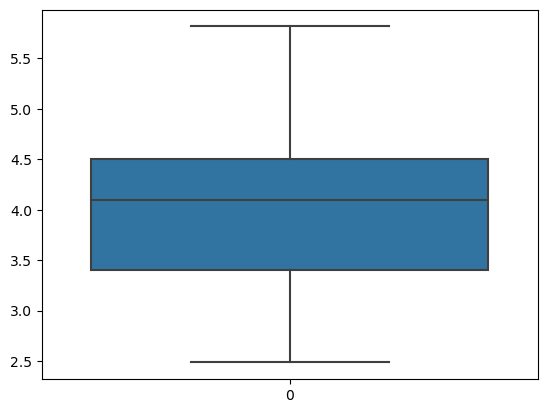

In [58]:
# Checking using boxplot
sns.boxplot(df["Unit of Measure (Per Pack)log_capped"])

<Axes: xlabel='Unit of Measure (Per Pack)log_capped', ylabel='Density'>

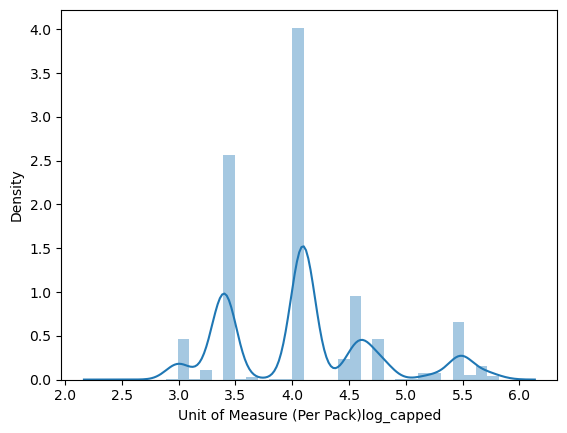

In [59]:
# Checking using histogram
sns.distplot(df["Unit of Measure (Per Pack)log_capped"], kde=True)

In [60]:
# Dropping the column 'Unit of Measure (Per Pack)log' as it is of no use
df.drop(['Unit of Measure (Per Pack)log', 'Unit of Measure (Per Pack)'], axis=1, inplace=True)


In [61]:
# Checking missing values
df["Unit of Measure (Per Pack)log_capped"].isnull().sum()

170

In [62]:
# Filling missing values
df["Unit of Measure (Per Pack)log_capped"].fillna(df["Unit of Measure (Per Pack)log_capped"].median(), inplace=True)

In [63]:
df["Line Item Quantity"].value_counts()

Line Item Quantity
10000    93
1000     91
100      87
2000     73
5000     69
         ..
814       1
37680     1
3939      1
2607      1
36639     1
Name: count, Length: 5065, dtype: int64

<Axes: xlabel='Line Item Quantity', ylabel='Density'>

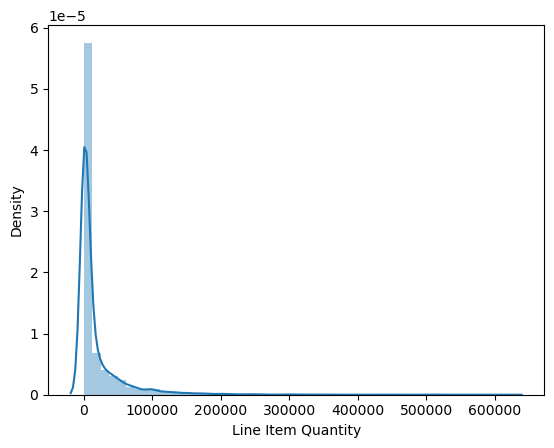

In [64]:
# Plotting histogram with distribution
sns.distplot(df["Line Item Quantity"], kde=True)

<Axes: >

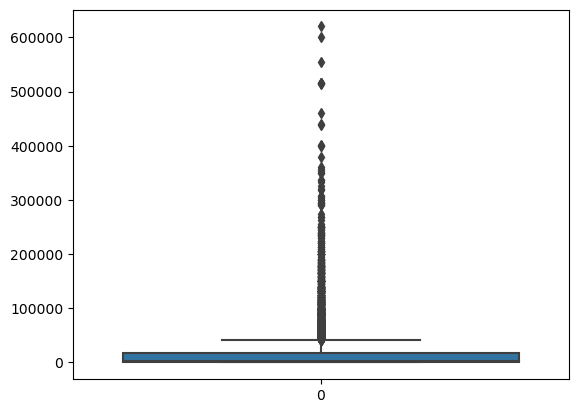

In [65]:
# Using boxplot
sns.boxplot(df["Line Item Quantity"])

In [66]:
#  Log transformation
df['Line Item Quantity_log'] = np.log1p(df['Line Item Quantity'])

# Remove extreme outliers using IQR
Q1 = df['Line Item Quantity_log'].quantile(0.25)
Q3 = df['Line Item Quantity_log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Line Item Quantity_log'] < (Q1 - 1.5 * IQR)) | (df['Line Item Quantity_log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Line Item Quantity_log'] = df.loc[~outlier_mask, 'Line Item Quantity_log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))



<Axes: >

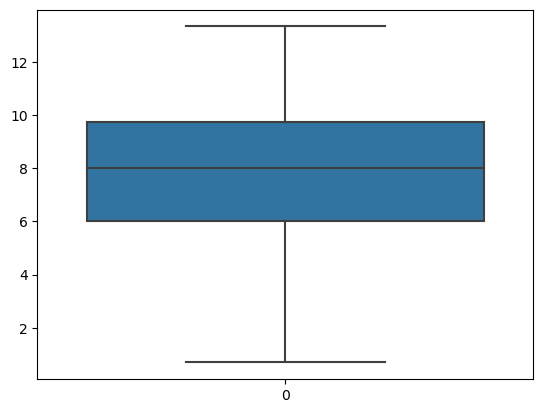

In [67]:
# Checking using boxplot
sns.boxplot(df["Line Item Quantity_log"])

<Axes: xlabel='Line Item Quantity_log', ylabel='Density'>

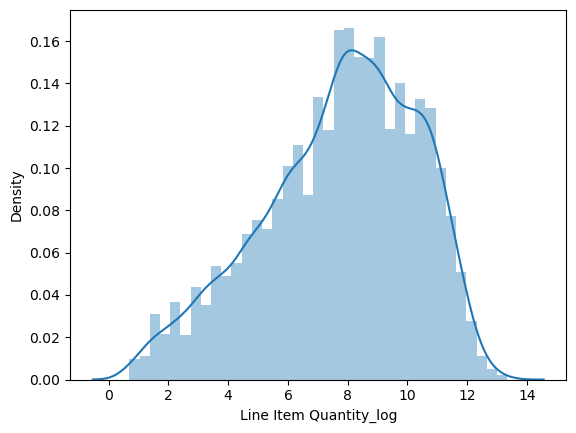

In [68]:
# Checking using histogram
sns.distplot(df["Line Item Quantity_log"], kde=True)

In [69]:
df["Line Item Value"].value_counts()

Line Item Value
200000.00    29
16000.00     23
800.00       18
0.00         17
14400.00     16
             ..
415552.08     1
561.46        1
438340.92     1
2604.00       1
72911.61      1
Name: count, Length: 8741, dtype: int64

<Axes: xlabel='Line Item Value', ylabel='Density'>

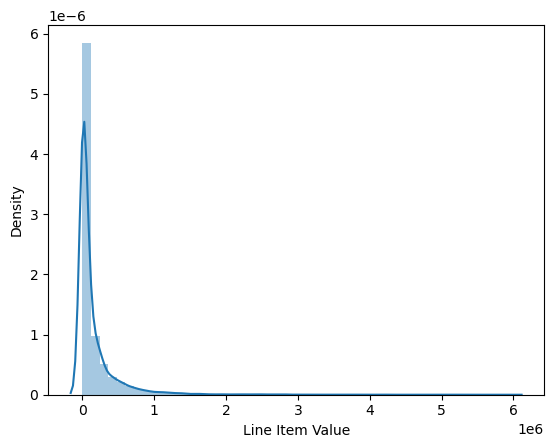

In [70]:
# Plotting histogram with distribution
sns.distplot(df["Line Item Value"], kde=True)

<Axes: >

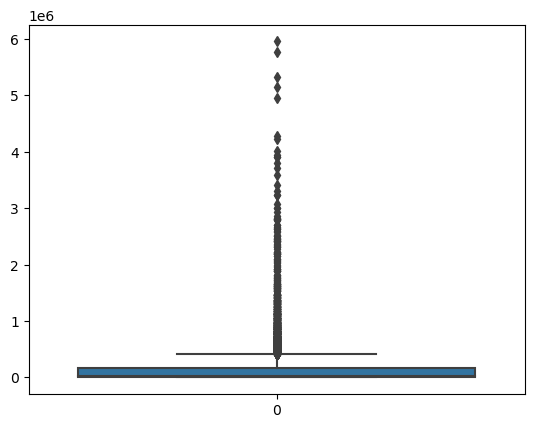

In [71]:
# Using boxplot
sns.boxplot(df["Line Item Value"])

In [72]:
#Log transformation
df['Line Item Value_log'] = np.log1p(df['Line Item Value'])

#Remove extreme outliers using IQR
Q1 = df['Line Item Value_log'].quantile(0.25)
Q3 = df['Line Item Value_log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Line Item Value_log'] < (Q1 - 1.5 * IQR)) | (df['Line Item Value_log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Line Item Value_log'] = df.loc[~outlier_mask, 'Line Item Value_log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))



<Axes: >

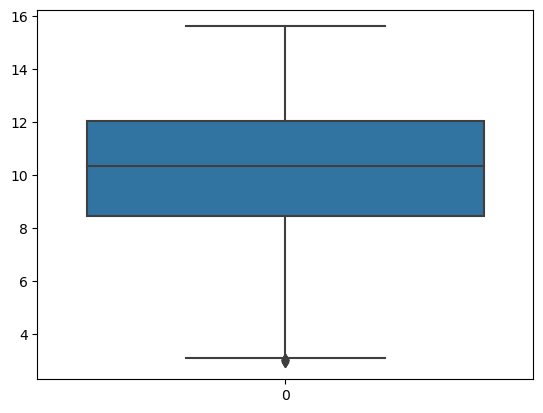

In [73]:
# Checking using boxplot
sns.boxplot(df["Line Item Value_log"])

In [74]:
# Checking missing values
df["Line Item Value_log"].isnull().sum()

109

In [75]:
# Filling missing values with median
df["Line Item Value_log"].fillna(df["Line Item Value_log"].median(), inplace=True)

In [76]:
df["Pack Price"].value_counts()

Pack Price
32.00    368
80.00    307
89.00    183
11.22    139
20.00    110
        ... 
12.37      1
16.80      1
19.56      1
10.84      1
1.38       1
Name: count, Length: 1175, dtype: int64

<Axes: xlabel='Pack Price', ylabel='Density'>

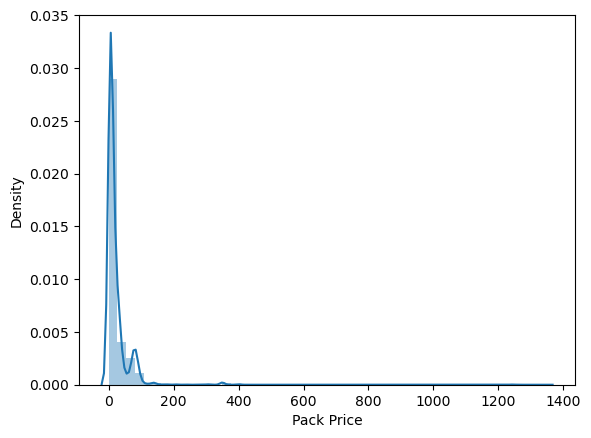

In [77]:
# Plotting histogram with distribution
sns.distplot(df["Pack Price"], kde=True)

<Axes: >

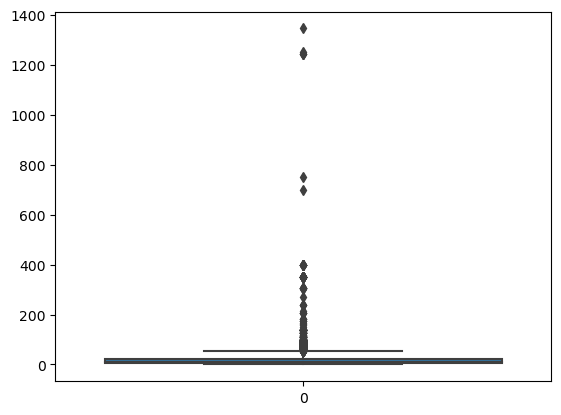

In [78]:
# Using boxplot
sns.boxplot(df["Pack Price"])

In [79]:
# Log transformation
df['Pack Price_log'] = np.log1p(df['Pack Price'])

# Remove extreme outliers using IQR
Q1 = df['Pack Price_log'].quantile(0.25)
Q3 = df['Pack Price_log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Pack Price_log'] < (Q1 - 1.5 * IQR)) | (df['Pack Price_log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Pack Price_log'] = df.loc[~outlier_mask, 'Pack Price_log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))



<Axes: >

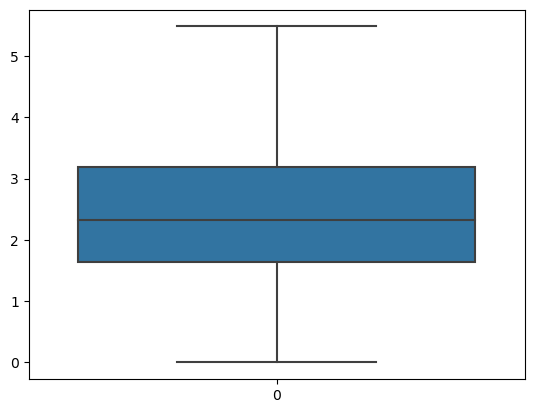

In [80]:
# Checking using boxplot
sns.boxplot(df["Pack Price_log"])

<Axes: xlabel='Pack Price_log', ylabel='Density'>

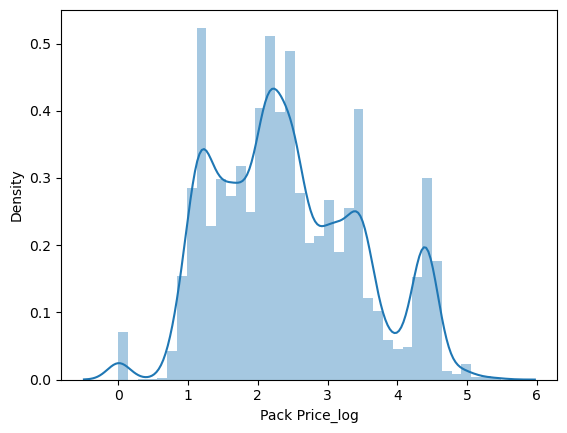

In [81]:
# Checking using histogram
sns.distplot(df["Pack Price_log"], kde=True)

In [82]:
df["Unit Price"].value_counts()

Unit Price
0.04     713
0.01     492
0.12     464
0.14     444
0.80     411
        ... 
3.25       1
1.21       1
1.80       1
1.48       1
26.91      1
Name: count, Length: 183, dtype: int64

<Axes: xlabel='Unit Price', ylabel='Density'>

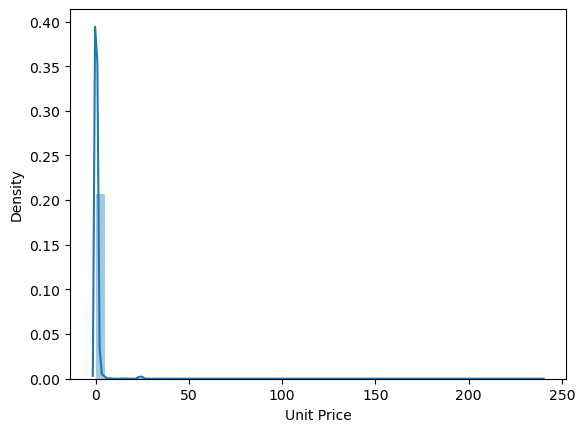

In [83]:
# Plotting histogram with distribution
sns.distplot(df["Unit Price"], kde=True)

<Axes: >

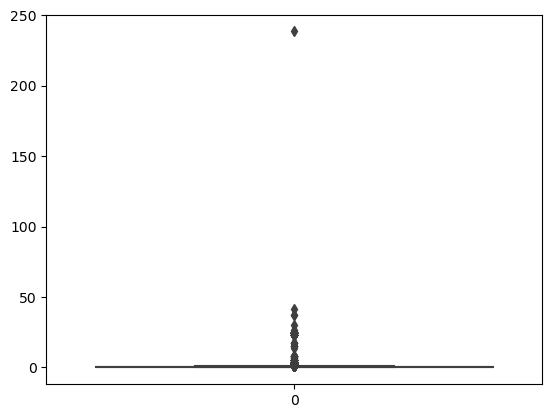

In [84]:
# Using boxplot
sns.boxplot(df["Unit Price"])

In [85]:

# Step 2: Log transformation
df['Unit Price_log'] = np.log1p(df['Unit Price'])

# Step 3: Remove extreme outliers using IQR
Q1 = df['Unit Price_log'].quantile(0.25)
Q3 = df['Unit Price_log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Unit Price_log'] < (Q1 - 1.5 * IQR)) | (df['Unit Price_log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Unit Price_log'] = df.loc[~outlier_mask, 'Unit Price_log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))


<Axes: >

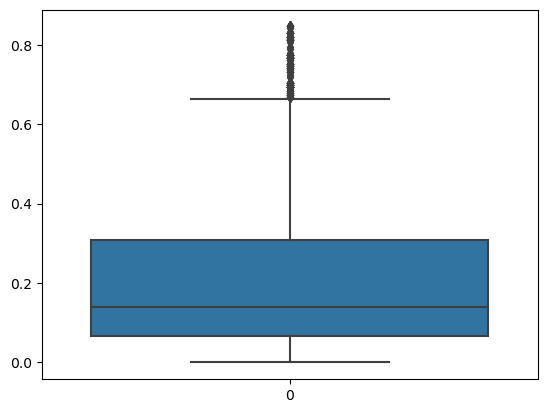

In [86]:
# Checking using boxplot
sns.boxplot(df["Unit Price_log"])

In [87]:
df["Unit Price_log"].describe()

count    9526.000000
mean        0.211368
std         0.193189
min         0.000000
25%         0.067659
50%         0.139762
75%         0.307485
max         0.845868
Name: Unit Price_log, dtype: float64

In [88]:
# Checking missing values
df["Unit Price_log"].isnull().sum()

798

In [89]:
# Filling missing values with median
df["Unit Price_log"].fillna(df["Unit Price_log"].median(), inplace=True)

<Axes: xlabel='Unit Price_log', ylabel='Density'>

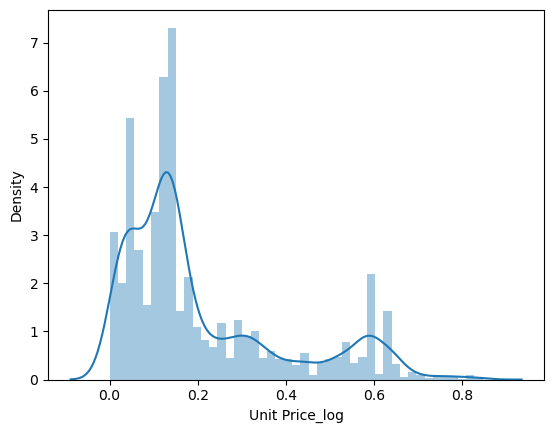

In [90]:
# Checking using histogram
sns.distplot(df["Unit Price_log"], kde=True)

In [91]:
# Checking missing values for Pack_Price_log
df["Pack Price_log"].isnull().sum()


63

In [92]:
# Filling missing values with median
df["Pack Price_log"].fillna(df["Pack Price_log"].median(), inplace=True)

In [93]:
pd.set_option('display.max_rows', None)

In [94]:
df["Manufacturing Site"].value_counts()

Manufacturing Site
Aurobindo Unit III, India                                                   3172
Mylan (formerly Matrix) Nashik                                              1415
Hetero Unit III Hyderabad IN                                                 869
Cipla, Goa, India                                                            665
Strides, Bangalore, India.                                                   540
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    219
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, SA                                                141
Chembio D

In [95]:
# Assuming your DataFrame is named 'df'
import pandas as pd

# Get the value counts for "Manufacturing Site"
manufacturing_site_counts = df["Manufacturing Site"].value_counts()

# Identify sites with counts less than 100
sites_to_merge = manufacturing_site_counts[manufacturing_site_counts < 100].index

# Replace those sites with "Other"
df["Manufacturing Site"] = df["Manufacturing Site"].replace(sites_to_merge, "Other")

# Display the updated value counts
print(df["Manufacturing Site"].value_counts())


Manufacturing Site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Other                             1088
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
BMS Meymac, France                 148
Aspen-OSD, Port Elizabeth, SA      141
Chembio Diagnostics Sys. Inc.      124
MSD, Haarlem, NL                   121
Standard Diagnostics, Korea        114
Aurobindo Unit VII, IN             111
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Aurobindo Unit III, India'),
  Text(2, 0, 'ABBVIE Ludwigshafen Germany'),
  Text(3, 0, 'Trinity Biotech, Plc'),
  Text(4, 0, 'Cipla, Goa, India'),
  Text(5, 0, 'BMS Meymac, France'),
  Text(6, 0, 'Chembio Diagnostics Sys. Inc.'),
  Text(7, 0, 'Inverness Japan'),
  Text(8, 0, 'Standard Diagnostics, Korea'),
  Text(9, 0, 'Mylan (formerly Matrix) Nashik'),
  Text(10, 0, 'MSD, Haarlem, NL'),
  Text(11, 0, 'Aspen-OSD, Port Elizabeth, SA'),
  Text(12, 0, 'ABBVIE (Abbott) Logis. UK'),
  Text(13, 0, 'Hetero Unit III Hyderabad IN'),
  Text(14, 0, 'Strides, Bangalore, India.'),
  Text(15, 0, 'Alere Medical Co., Ltd.'),
  Text(16, 0, 'Aurobindo Unit VII, IN')])

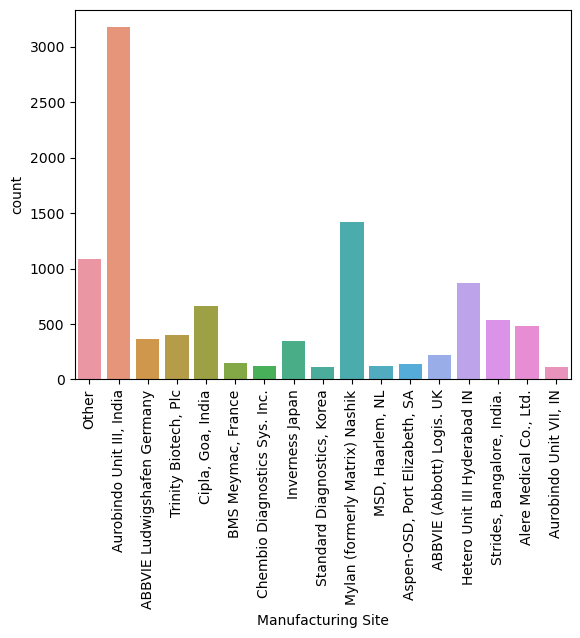

In [96]:
# Plotting bar chart
sns.countplot(x="Manufacturing Site", data=df)
plt.xticks(rotation=90)

In [97]:
df["First Line Designation"].value_counts()

First Line Designation
Yes    7030
No     3294
Name: count, dtype: int64

<Axes: xlabel='First Line Designation', ylabel='count'>

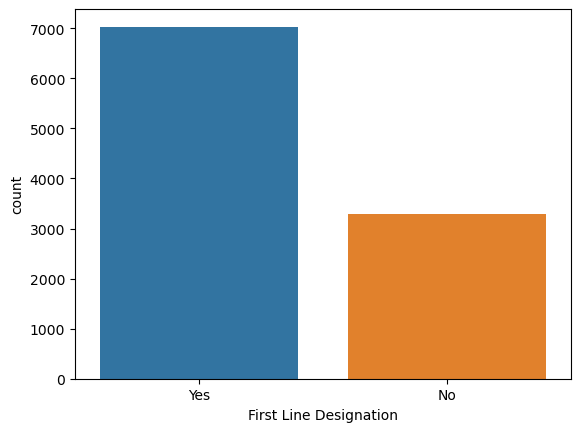

In [98]:
# Plotting bar chart
sns.countplot(x="First Line Designation", data=df)

In [99]:
df["Weight (Kilograms)"].value_counts()

Weight (Kilograms)
Weight Captured Separately    1507
2                               29
6                               26
1                               23
60                              20
5                               20
4                               19
3                               18
14                              17
21                              17
18                              17
12                              17
17                              17
9                               17
39                              17
36                              17
25                              16
22                              16
76                              16
See DN-304 (ID#:10589)          16
7                               16
58                              16
15                              15
46                              15
54                              15
13                              15
24                              15
30                              15
1

In [100]:
# Dropping df["Weight (Kilograms)"]
df.drop("Weight (Kilograms)", axis=1, inplace=True)

In [101]:
df["Freight Cost (USD)"].value_counts()

Freight Cost (USD)
Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
See DN-304 (ID#:10589)                  16
7445.8                                  16
9341.49                                 15
See ASN-32231 (ID#:13648)               14
See ASN-31750 (ID#:19272)               14
See ASN-28279 (ID#:13547)               13
7329.83                                 12
See DN-3015 (ID#:82554)                 12
1211.48                                 11
25231.96                                11
17090                                   10
15322.73                                10
15459.09                                10
15128.37                                10
See DN-2035 (ID#:82356)                 10
14547.55                                10
See ASN-26738 (ID#:15115)               10
16532.5                            

In [102]:

# Replace "Freight Included in Commodity Cost" with 0
df["Freight Cost (USD)"] = df["Freight Cost (USD)"].replace("Freight Included in Commodity Cost", 0)


In [103]:
# Replace "Invoiced Separately" with 0
df["Freight Cost (USD)"] = df["Freight Cost (USD)"].replace("Invoiced Separately", 0)



In [104]:
# Convert "Freight Cost (USD)" to numeric with errors='coerce'
df["Freight Cost (USD)"] = pd.to_numeric(df["Freight Cost (USD)"], errors='coerce')


In [105]:
# Filling Freight Cost (USD) missing values with median 
df["Freight Cost (USD)"] = df["Freight Cost (USD)"].fillna(df["Freight Cost (USD)"].median())

<Axes: >

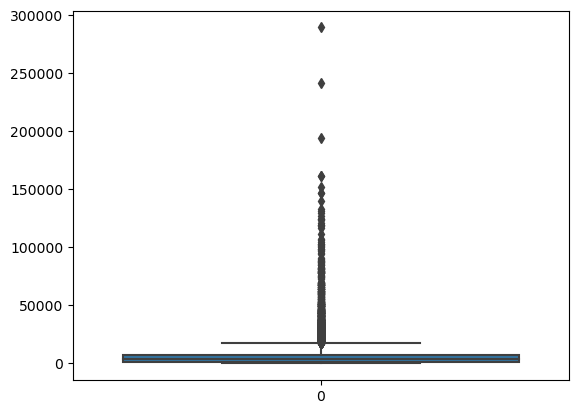

In [106]:
# Checking using boxplot
sns.boxplot(df["Freight Cost (USD)"])

In [107]:

# Step 1: Log transformation
df["Freight Cost (USD)_log"] = np.log1p(df["Freight Cost (USD)"])

# Step 2: Identify outliers using Tukey's method on the log-transformed values
Q1 = df["Freight Cost (USD)_log"].quantile(0.25)
Q3 = df["Freight Cost (USD)_log"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (df["Freight Cost (USD)_log"] < lower_bound) | (df["Freight Cost (USD)_log"] > upper_bound)

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outliers_mask, "Freight Cost (USD)_log"] = df.loc[~outliers_mask, "Freight Cost (USD)_log"].clip(lower=lower_bound, upper=upper_bound)




<Axes: >

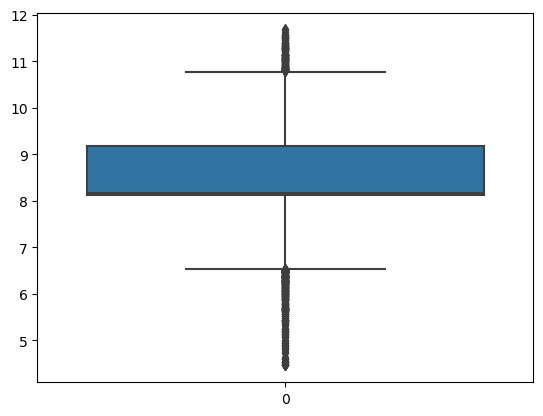

In [108]:
# Boxplot after log transformation
sns.boxplot(df["Freight Cost (USD)_log"])

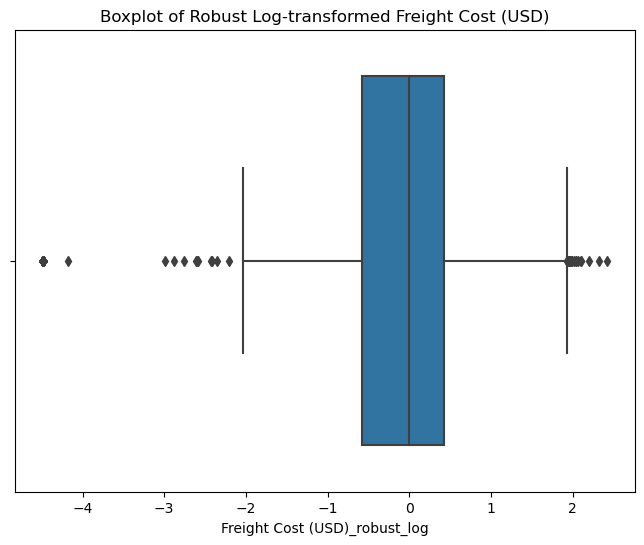

0       -0.830197
1        0.132653
2       -0.418686
3        0.825820
4        1.398079
5        0.280448
6       -4.482960
7        0.306843
8        0.000000
9       -4.482960
10      -4.482960
11       0.735231
12      -4.482960
13       1.587304
14      -0.384470
15      -4.482960
16      -4.482960
17      -0.070624
18      -0.744224
19      -0.153576
20       0.821924
21      -4.482960
22       0.091364
23      -0.382276
24      -0.004869
25      -0.074653
26       1.129889
27       1.141402
28       1.139447
29       0.678582
30       0.971703
31      -4.482960
32      -0.242068
33      -0.275108
34      -4.176078
35      -4.482960
36      -4.482960
37      -4.482960
38       0.234703
39      -0.158987
40      -4.482960
41      -1.253619
42      -4.482960
43       0.080667
44       0.236951
45      -0.398710
46       0.072457
47      -4.482960
48      -4.482960
49      -0.259518
50      -4.482960
51       0.828662
52      -4.482960
53      -4.482960
54       0.732737
55      -4

In [109]:
from sklearn.preprocessing import RobustScaler

# Step 1: Apply RobustScaler for robust log transformation
scaler = RobustScaler()
df["Freight Cost (USD)_robust_log"] = scaler.fit_transform(df[["Freight Cost (USD)"]].apply(np.log1p))

# Step 2: Visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Freight Cost (USD)_robust_log"])
plt.title('Boxplot of Robust Log-transformed Freight Cost (USD)')
plt.show()

# Display the DataFrame with the new columns
print(df["Freight Cost (USD)_robust_log"])


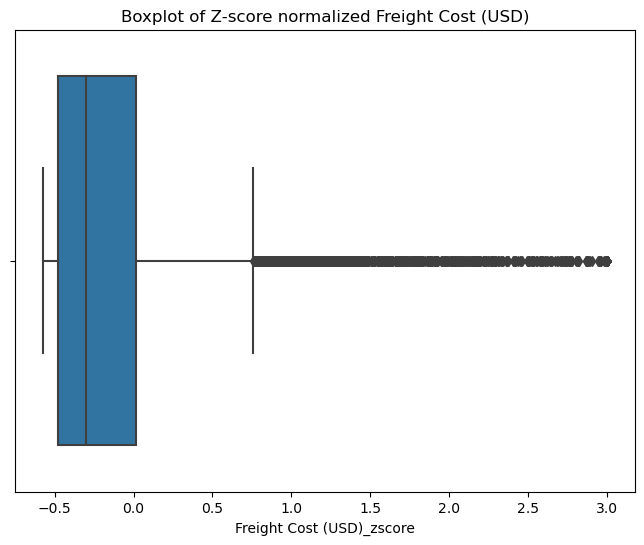

0       -0.514749
1       -0.228440
2       -0.447905
3        0.650544
4        2.903802
5       -0.121381
6       -0.574468
7       -0.099035
8       -0.302806
9       -0.574468
10      -0.574468
11       0.463998
12      -0.574468
13       3.000000
14      -0.439752
15      -0.574468
16      -0.574468
17      -0.335642
18      -0.504600
19      -0.369180
20       0.641869
21      -0.574468
22      -0.253542
23      -0.439211
24      -0.305208
25      -0.337391
26       1.558388
27       1.603645
28       1.595892
29       0.362070
30       1.023910
31      -0.574468
32      -0.399784
33      -0.410002
34      -0.574410
35      -0.574468
36      -0.574468
37      -0.574468
38      -0.157649
39      -0.371196
40      -0.574468
41      -0.546917
42      -0.574468
43      -0.259744
44      -0.155937
45      -0.443207
46      -0.264421
47      -0.574468
48      -0.574468
49      -0.405257
50      -0.574468
51       0.656908
52      -0.574468
53      -0.574468
54       0.459286
55      -0

In [110]:

from scipy.stats import zscore

# Step 1: Calculate z-scores for the "Freight Cost (USD)"
df["Freight Cost (USD)_zscore"] = zscore(df["Freight Cost (USD)"])

# Step 2: Identify and handle outliers (considering z-score threshold, e.g., 3)
zscore_threshold = 3
outliers_mask = (df["Freight Cost (USD)_zscore"].abs() > zscore_threshold)

# Cap outliers to the threshold value
df.loc[outliers_mask, "Freight Cost (USD)_zscore"] = np.sign(df.loc[outliers_mask, "Freight Cost (USD)_zscore"]) * zscore_threshold

# Display boxplot for visual verification
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Freight Cost (USD)_zscore"])
plt.title('Boxplot of Z-score normalized Freight Cost (USD)')
plt.show()

# Display the DataFrame with the new columns
print(df["Freight Cost (USD)_zscore"])


In [111]:
df.isnull().sum()

PQ #                                       0
PO / SO #                                  0
ASN/DN #                                   0
Country                                    0
Fulfill Via                                0
Vendor INCO Term                           0
Shipment Mode                              0
Product Group                              0
Sub Classification                         0
Line Item Quantity                         0
Line Item Value                            0
Pack Price                                 0
Unit Price                                 0
Manufacturing Site                         0
First Line Designation                     0
Freight Cost (USD)                         0
Line Item Insurance (USD)                287
Unit of Measure (Per Pack)log_capped       0
Line Item Quantity_log                     0
Line Item Value_log                        0
Pack Price_log                             0
Unit Price_log                             0
Freight Co

In [112]:
df["Line Item Insurance (USD)"].value_counts()

Line Item Insurance (USD)
0.00       54
0.02       37
0.07       33
0.06       30
0.05       30
0.01       26
0.03       23
0.09       21
0.08       20
0.15       18
0.26       18
0.13       18
0.49       18
0.12       18
0.24       18
0.44       17
0.14       17
0.34       16
0.17       15
0.42       15
0.10       15
0.25       15
0.38       15
0.19       15
0.28       15
0.29       15
342.39     15
0.18       14
0.30       14
0.04       14
330.00     13
0.31       13
0.20       13
5.12       13
0.35       12
0.96       12
0.54       12
0.51       12
1.03       11
0.99       11
0.71       11
0.52       11
0.82       11
0.23       11
0.16       11
1.10       10
0.57       10
320.00     10
31.36      10
0.41       10
0.22       10
36.96      10
0.67       10
0.64       10
0.60        9
0.86        9
0.37        9
1.92        9
1.16        9
0.11        9
0.46        9
2.96        9
0.89        9
0.72        9
1.30        8
1.14        8
24.70       8
2.24        8
0.81        8
1.06    

In [113]:
# Checking missing values
df["Line Item Insurance (USD)"].isnull().sum()

287

In [114]:
# Filling missing values with median
df["Line Item Insurance (USD)"].fillna(df["Line Item Insurance (USD)"].median(), inplace=True)

<Axes: >

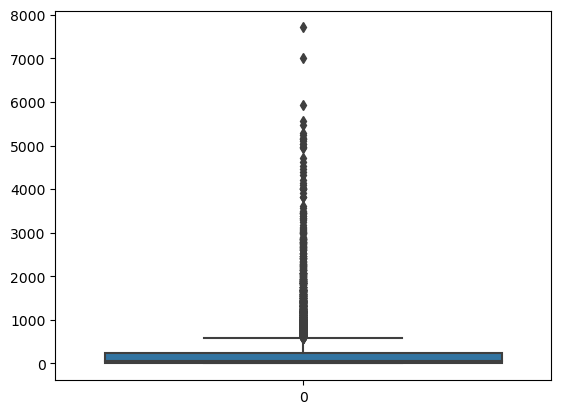

In [115]:
# Using boxplot
sns.boxplot(df["Line Item Insurance (USD)"])


In [116]:

# Step 1: Log transformation
df["Line Item Insurance (USD)_log"] = np.log1p(df["Line Item Insurance (USD)"])

# Step 2: Identify outliers using Tukey's method on the log-transformed values
Q1 = df["Line Item Insurance (USD)_log"].quantile(0.25)
Q3 = df["Line Item Insurance (USD)_log"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (df["Line Item Insurance (USD)_log"] < lower_bound) | (df["Line Item Insurance (USD)_log"] > upper_bound)

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outliers_mask, "Line Item Insurance (USD)_log"] = df.loc[~outliers_mask, "Line Item Insurance (USD)_log"].clip(lower=lower_bound, upper=upper_bound)




<Axes: >

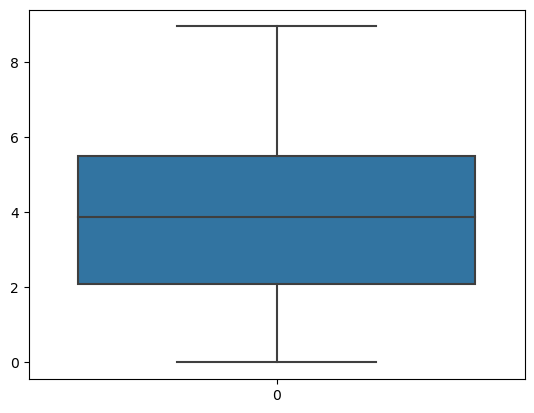

In [117]:
# Plot boxplot
sns.boxplot(df["Line Item Insurance (USD)_log"])

In [118]:
# Check missing values
df["Line Item Insurance (USD)_log"].isnull().sum()

0

In [119]:
# Filling the missing values with median
df["Line Item Insurance (USD)_log"] = df["Line Item Insurance (USD)_log"].fillna(df["Line Item Insurance (USD)_log"].median())

In [120]:
df.isnull().sum()


PQ #                                       0
PO / SO #                                  0
ASN/DN #                                   0
Country                                    0
Fulfill Via                                0
Vendor INCO Term                           0
Shipment Mode                              0
Product Group                              0
Sub Classification                         0
Line Item Quantity                         0
Line Item Value                            0
Pack Price                                 0
Unit Price                                 0
Manufacturing Site                         0
First Line Designation                     0
Freight Cost (USD)                         0
Line Item Insurance (USD)                  0
Unit of Measure (Per Pack)log_capped       0
Line Item Quantity_log                     0
Line Item Value_log                        0
Pack Price_log                             0
Unit Price_log                             0
Freight Co

In [121]:
columns_to_delete = ["Line Item Quantity", "Line Item Value", "Pack Price", "Unit Price", 
                      "Line Item Insurance (USD)", "Line Item Insurance (USD)_capped", 
                      "Freight Cost (USD)_log", "Freight Cost (USD)", "Freight Cost (USD)_zscore"]

# Drop the specified columns
df = df.drop(columns=columns_to_delete, errors='ignore')

# Display the updated DataFrame
df.head()


,PQ #,PO / SO #,ASN/DN #,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Manufacturing Site,First Line Designation,Unit of Measure (Per Pack)log_capped,Line Item Quantity_log,Line Item Value_log,Pack Price_log,Unit Price_log,Freight Cost (USD)_robust_log,Line Item Insurance (USD)_log
0,Pre,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,Air,HRDT,HIV test,Other,Yes,3.401197,2.995732,6.313548,3.401197,0.678034,-0.830197,3.872034
1,Pre,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,"Aurobindo Unit III, India",Yes,5.480639,6.908755,8.732466,1.974081,0.029559,0.132653,3.872034
2,Pre,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,Air,HRDT,HIV test,Other,Yes,4.605170,6.216606,10.596660,4.394449,0.587787,-0.418686,3.872034
3,Pre,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Adult,Other,Yes,4.094345,10.371019,11.754787,1.607436,0.067659,0.825820,3.872034
4,Pre,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Adult,"Aurobindo Unit III, India",Yes,4.094345,10.545368,11.708500,1.435085,0.048790,1.398079,3.872034


In [122]:
df.isnull().sum()

PQ #                                    0
PO / SO #                               0
ASN/DN #                                0
Country                                 0
Fulfill Via                             0
Vendor INCO Term                        0
Shipment Mode                           0
Product Group                           0
Sub Classification                      0
Manufacturing Site                      0
First Line Designation                  0
Unit of Measure (Per Pack)log_capped    0
Line Item Quantity_log                  0
Line Item Value_log                     0
Pack Price_log                          0
Unit Price_log                          0
Freight Cost (USD)_robust_log           0
Line Item Insurance (USD)_log           0
dtype: int64

In [125]:
from sklearn.preprocessing import LabelEncoder

# Identify object columns
object_columns = df.select_dtypes(include='object').columns.tolist()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each object column
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Now, the object columns in the DataFrame are label encoded


In [126]:
df.head()

,PQ #,PO / SO #,ASN/DN #,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Manufacturing Site,First Line Designation,Unit of Measure (Per Pack)log_capped,Line Item Quantity_log,Line Item Value_log,Pack Price_log,Unit Price_log,Freight Cost (USD)_robust_log,Line Item Insurance (USD)_log
0,1,1,0,1,0,5,0,3,2,13,1,3.401197,2.995732,6.313548,3.401197,0.678034,-0.830197,3.872034
1,1,1,0,14,0,5,0,2,5,4,1,5.480639,6.908755,8.732466,1.974081,0.029559,0.132653,3.872034
2,1,1,0,1,0,6,0,3,2,13,1,4.605170,6.216606,10.596660,4.394449,0.587787,-0.418686,3.872034
3,1,1,0,14,0,5,0,2,1,13,1,4.094345,10.371019,11.754787,1.607436,0.067659,0.825820,3.872034
4,1,1,0,14,0,5,0,2,1,4,1,4.094345,10.545368,11.708500,1.435085,0.048790,1.398079,3.872034


In [127]:

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop("Line Item Value_log", axis=1)  # Features
y = df[["Line Item Value_log"]]  # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shapes: X_train =", X_train.shape, "y_train =", y_train.shape)
print("Testing set shapes: X_test =", X_test.shape, "y_test =", y_test.shape)

Training set shapes: X_train = (7226, 17) y_train = (7226, 1)
Testing set shapes: X_test = (3098, 17) y_test = (3098, 1)


In [128]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training features (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features (X_test) using the parameters learned from the training set
X_test_scaled = scaler.transform(X_test)

# Fit and transform the training target variable (y_train)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Transform the testing target variable (y_test) using the parameters learned from the training set
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()


## Linear Regression 

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train_scaled)

# Predict the target variable for the training set
y_train_pred = model.predict(X_train_scaled)

# Predict the target variable for the testing set
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model performance on training set
mse_train = mean_squared_error(y_train_scaled, y_train_pred)
r2_train = r2_score(y_train_scaled, y_train_pred)

# Evaluate the model performance on testing set
mse_test = mean_squared_error(y_test_scaled, y_test_pred)
r2_test = r2_score(y_test_scaled, y_test_pred)

# Print the metrics
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2):", r2_train)
print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2):", r2_test)


Training Set Metrics:
Mean Squared Error (MSE): 0.002132972686180879
R-squared (R2): 0.9431504659696892

Testing Set Metrics:
Mean Squared Error (MSE): 0.002927189036769178
R-squared (R2): 0.9224744057399232


## Decision Tree 

In [131]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the scaled training data
tree_model.fit(X_train_scaled, y_train_scaled)

# Predict the target variable for the training set
y_train_pred_tree = tree_model.predict(X_train_scaled)

# Predict the target variable for the testing set
y_test_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate the model performance on training set
mse_train_tree = mean_squared_error(y_train_scaled, y_train_pred_tree)
r2_train_tree = r2_score(y_train_scaled, y_train_pred_tree)

# Evaluate the model performance on testing set
mse_test_tree = mean_squared_error(y_test_scaled, y_test_pred_tree)
r2_test_tree = r2_score(y_test_scaled, y_test_pred_tree)

# Print the metrics
print("Decision Tree Regressor - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_tree)
print("R-squared (R2):", r2_train_tree)
print("\nDecision Tree Regressor - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_tree)
print("R-squared (R2):", r2_test_tree)


Decision Tree Regressor - Training Set Metrics:
Mean Squared Error (MSE): 2.8273269928120395e-34
R-squared (R2): 1.0

Decision Tree Regressor - Testing Set Metrics:
Mean Squared Error (MSE): 0.0010425367367077507
R-squared (R2): 0.9723887733125578


 ## Decision Tree with Pre Pruning 

In [132]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor model with max_depth
tree_model_pruned = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train the pruned model on the scaled training data
tree_model_pruned.fit(X_train_scaled, y_train_scaled)

# Predict the target variable for the training set
y_train_pred_tree_pruned = tree_model_pruned.predict(X_train_scaled)

# Predict the target variable for the testing set
y_test_pred_tree_pruned = tree_model_pruned.predict(X_test_scaled)

# Evaluate the pruned model performance on training set
mse_train_tree_pruned = mean_squared_error(y_train_scaled, y_train_pred_tree_pruned)
r2_train_tree_pruned = r2_score(y_train_scaled, y_train_pred_tree_pruned)

# Evaluate the pruned model performance on testing set
mse_test_tree_pruned = mean_squared_error(y_test_scaled, y_test_pred_tree_pruned)
r2_test_tree_pruned = r2_score(y_test_scaled, y_test_pred_tree_pruned)

# Print the metrics for the pruned model
print("Pruned Decision Tree Regressor - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_tree_pruned)
print("R-squared (R2):", r2_train_tree_pruned)
print("\nPruned Decision Tree Regressor - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_tree_pruned)
print("R-squared (R2):", r2_test_tree_pruned)


Pruned Decision Tree Regressor - Training Set Metrics:
Mean Squared Error (MSE): 0.0029913580490706355
R-squared (R2): 0.9202721571123467

Pruned Decision Tree Regressor - Testing Set Metrics:
Mean Squared Error (MSE): 0.00320714782545885
R-squared (R2): 0.9150597935680175


## Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model on the scaled training data
random_forest_model.fit(X_train_scaled, y_train_scaled)

# Predict the target variable for the training set
y_train_pred_rf = random_forest_model.predict(X_train_scaled)

# Predict the target variable for the testing set
y_test_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate the model performance on training set
mse_train_rf = mean_squared_error(y_train_scaled, y_train_pred_rf)
r2_train_rf = r2_score(y_train_scaled, y_train_pred_rf)

# Evaluate the model performance on testing set
mse_test_rf = mean_squared_error(y_test_scaled, y_test_pred_rf)
r2_test_rf = r2_score(y_test_scaled, y_test_pred_rf)

# Print the metrics for the Random Forest model
print("Random Forest Regressor - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_rf)
print("R-squared (R2):", r2_train_rf)
print("\nRandom Forest Regressor - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_rf)
print("R-squared (R2):", r2_test_rf)


Random Forest Regressor - Training Set Metrics:
Mean Squared Error (MSE): 5.3954922858756026e-05
R-squared (R2): 0.9985619542889441

Random Forest Regressor - Testing Set Metrics:
Mean Squared Error (MSE): 0.0007080791506670573
R-squared (R2): 0.9812467673767928


## Ada Boost

In [135]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize a base model (e.g., Decision Tree Regressor)
base_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Initialize the AdaBoost Regressor model
adaboost_model = AdaBoostRegressor(base_model, n_estimators=50, random_state=42, learning_rate=0.1)

# Train the AdaBoost Regressor on the scaled training data
adaboost_model.fit(X_train_scaled, y_train_scaled)

# Predict the target variable for the training set
y_train_pred_adaboost = adaboost_model.predict(X_train_scaled)

# Predict the target variable for the testing set
y_test_pred_adaboost = adaboost_model.predict(X_test_scaled)

# Evaluate the model performance on training set
mse_train_adaboost = mean_squared_error(y_train_scaled, y_train_pred_adaboost)
r2_train_adaboost = r2_score(y_train_scaled, y_train_pred_adaboost)

# Evaluate the model performance on testing set
mse_test_adaboost = mean_squared_error(y_test_scaled, y_test_pred_adaboost)
r2_test_adaboost = r2_score(y_test_scaled, y_test_pred_adaboost)

# Print the metrics for the AdaBoost Regressor model
print("AdaBoost Regressor - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_adaboost)
print("R-squared (R2):", r2_train_adaboost)
print("\nAdaBoost Regressor - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_adaboost)
print("R-squared (R2):", r2_test_adaboost)


AdaBoost Regressor - Training Set Metrics:
Mean Squared Error (MSE): 0.0022187200542406298
R-squared (R2): 0.9408650649656799

AdaBoost Regressor - Testing Set Metrics:
Mean Squared Error (MSE): 0.0024890685632310027
R-squared (R2): 0.9340778757044194


## Gradient Boost

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gradient_boost_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regressor on the scaled training data
gradient_boost_model.fit(X_train_scaled, y_train_scaled)

# Predict the target variable for the training set
y_train_pred_gradient_boost = gradient_boost_model.predict(X_train_scaled)

# Predict the target variable for the testing set
y_test_pred_gradient_boost = gradient_boost_model.predict(X_test_scaled)

# Evaluate the model performance on the training set
mse_train_gradient_boost = mean_squared_error(y_train_scaled, y_train_pred_gradient_boost)
r2_train_gradient_boost = r2_score(y_train_scaled, y_train_pred_gradient_boost)

# Evaluate the model performance on the testing set
mse_test_gradient_boost = mean_squared_error(y_test_scaled, y_test_pred_gradient_boost)
r2_test_gradient_boost = r2_score(y_test_scaled, y_test_pred_gradient_boost)

# Print the metrics for the Gradient Boosting Regressor model
print("Gradient Boosting Regressor - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_gradient_boost)
print("R-squared (R2):", r2_train_gradient_boost)
print("\nGradient Boosting Regressor - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_gradient_boost)
print("R-squared (R2):", r2_test_gradient_boost)


Gradient Boosting Regressor - Training Set Metrics:
Mean Squared Error (MSE): 0.00040946390823627665
R-squared (R2): 0.9890866711344806

Gradient Boosting Regressor - Testing Set Metrics:
Mean Squared Error (MSE): 0.0008496684963033628
R-squared (R2): 0.9774968222849427


## XGBoost

In [140]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the XGBoost Regressor on the scaled training data
xgb_model.fit(X_train_scaled, y_train_scaled)

# Predict the target variable for the training set
y_train_pred_xgb = xgb_model.predict(X_train_scaled)

# Predict the target variable for the testing set
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model performance on the training set
mse_train_xgb = mean_squared_error(y_train_scaled, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train_scaled, y_train_pred_xgb)

# Evaluate the model performance on the testing set
mse_test_xgb = mean_squared_error(y_test_scaled, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test_scaled, y_test_pred_xgb)

# Print the metrics for the XGBoost Regressor model
print("XGBoost Regressor - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_xgb)
print("R-squared (R2):", r2_train_xgb)
print("\nXGBoost Regressor - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_xgb)
print("R-squared (R2):", r2_test_xgb)


XGBoost Regressor - Training Set Metrics:
Mean Squared Error (MSE): 2.086259082341411e-05
R-squared (R2): 0.9994439551079767

XGBoost Regressor - Testing Set Metrics:
Mean Squared Error (MSE): 0.0003920539879698922
R-squared (R2): 0.9896165850522091


## Summary 

In [141]:
import pandas as pd

# Create a DataFrame with the model metrics
metrics_data = {
    "Model": ["Logistic Regressor", "Decision Tree Regressor", "Pruned Decision Tree Regressor", 
              "Random Forest Regressor", "AdaBoost Regressor", "Gradient Boosting Regressor", 
              "XGBoost Regressor"],
    "MSE Train": [0.0021, 2.8273e-34, 0.0029914, 5.3955e-05, 0.0022187, 0.0004095, 2.0863e-05],
    "R2 Train": [0.9432, 1.0, 0.9203, 0.9986, 0.9409, 0.9891, 0.9994],
    "MSE Test": [0.0029, 0.001, 0.0032, 0.0007, 0.0025, 0.0008497, 0.0003921],
    "R2 Test": [0.9225, 0.9724, 0.9151, 0.9812, 0.9341, 0.9775, 0.9896]
}

metrics_df = pd.DataFrame(metrics_data)

# Print the summary table
print(metrics_df)


                            Model     MSE Train  R2 Train  MSE Test  R2 Test
0              Logistic Regressor  2.100000e-03    0.9432  0.002900   0.9225
1         Decision Tree Regressor  2.827300e-34    1.0000  0.001000   0.9724
2  Pruned Decision Tree Regressor  2.991400e-03    0.9203  0.003200   0.9151
3         Random Forest Regressor  5.395500e-05    0.9986  0.000700   0.9812
4              AdaBoost Regressor  2.218700e-03    0.9409  0.002500   0.9341
5     Gradient Boosting Regressor  4.095000e-04    0.9891  0.000850   0.9775
6               XGBoost Regressor  2.086300e-05    0.9994  0.000392   0.9896
